In [1]:
import os
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [2]:
from radismart.cardiac.perfusion.functions import gen_defect_extent_bull_eye_map, gen_defect_severity_bull_eye_map,gen_score_bull_eye
from radismart.cardiac.perfusion.functions import cal_defect_extent, cal_defect_severity,cal_tdp, cal_categoric_scores

resource_path = '../../resource'
os.path.exists(resource_path)

True

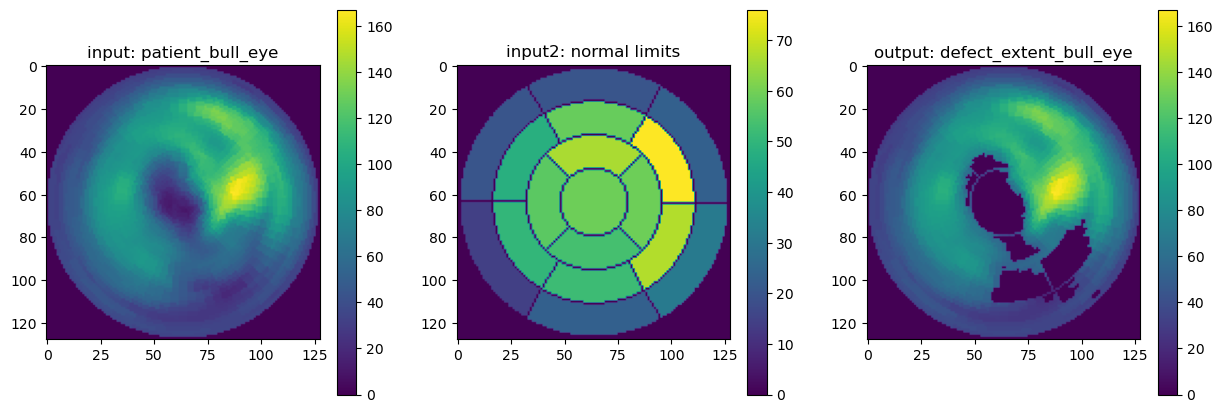

In [ ]:
commercial_software_gen_cad_bull_eye = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(resource_path, 'perfusion', 'BullEye_cad'))).astype(np.float32)[1]
normal_limits_bull_eye = np.load(os.path.join(resource_path, 'perfusion', 'normal_limits', 'male_rest_normal_limits.npy')).astype(np.float32)

defect_extent_polor_map = gen_defect_extent_bull_eye_map(commercial_software_gen_cad_bull_eye, normal_limits_bull_eye)


plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(commercial_software_gen_cad_bull_eye)
plt.title('input: patient_bull_eye')
plt.colorbar()

plt.subplot(132)
plt.imshow(normal_limits_bull_eye)
plt.title('input2: normal limits')
plt.colorbar()

plt.subplot(133)
plt.imshow(defect_extent_polor_map)
plt.title('output: defect_extent_bull_eye')
plt.colorbar()

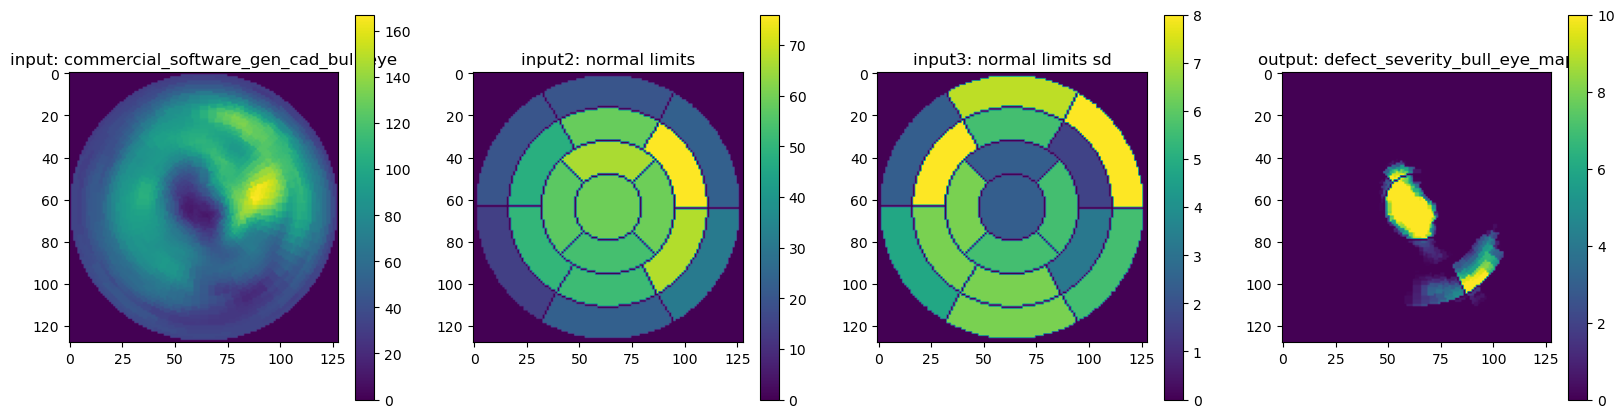

In [10]:
normal_limits_bull_eye_sd = np.load(os.path.join(resource_path, 'perfusion', 'normal_limits', 'male_rest_sd.npy')).astype(np.float32)
defect_severity_polor_map = gen_defect_severity_bull_eye_map(commercial_software_gen_cad_bull_eye, normal_limits_bull_eye, normal_limits_bull_eye_sd)

plt.figure(figsize=(20,5))
plt.subplot(141)
plt.imshow(commercial_software_gen_cad_bull_eye)
plt.title('input: commercial_software_gen_cad_bull_eye')
plt.colorbar()

plt.subplot(142)
plt.imshow(normal_limits_bull_eye)
plt.title('input2: normal limits')
plt.colorbar()

plt.subplot(143)
plt.imshow(normal_limits_bull_eye_sd)
plt.title('input3: normal limits sd')
plt.colorbar()

plt.subplot(144)
plt.imshow(defect_severity_polor_map)
plt.title('output: defect_severity_bull_eye_map')
plt.colorbar()


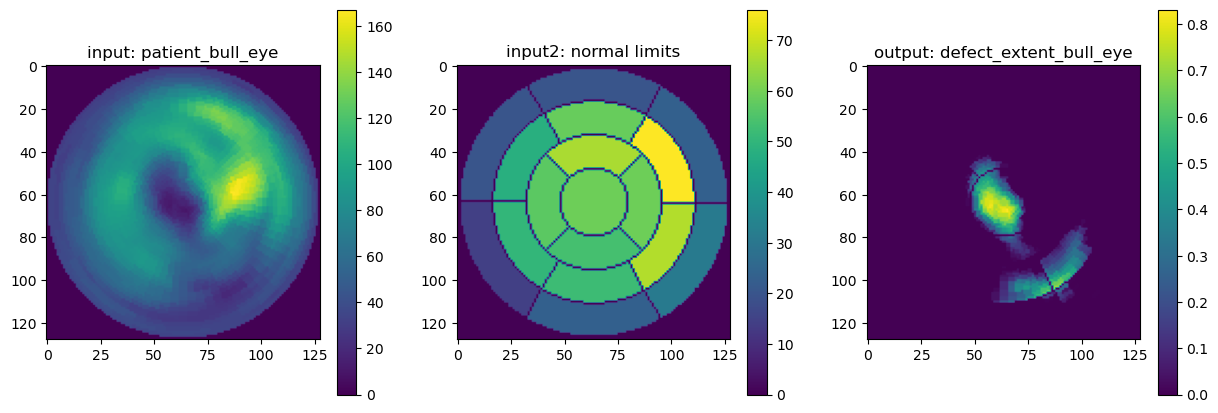

In [11]:
score_bull_eye = gen_score_bull_eye(commercial_software_gen_cad_bull_eye, normal_limits_bull_eye)


plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(commercial_software_gen_cad_bull_eye)
plt.title('input: patient_bull_eye')
plt.colorbar()

plt.subplot(132)
plt.imshow(normal_limits_bull_eye)
plt.title('input2: normal limits')
plt.colorbar()

plt.subplot(133)
plt.imshow(score_bull_eye)
plt.title('output: defect_extent_bull_eye')
plt.colorbar()



In [12]:
segment17 = np.load(os.path.join(resource_path, 'perfusion', 'segment17.npy')).astype(np.float32)
segment_coronary_artery = np.load(os.path.join(resource_path, 'perfusion', 'segment_coronary_artery.npy')).astype(np.float32)
segment_myocardial_wall = np.load(os.path.join(resource_path, 'perfusion', 'segment_myocardial_wall.npy')).astype(np.float32)

{1.0: 0.0, 2.0: 0.0, 3.0: 0.0, 4.0: 1.911589008363202, 5.0: 8.323281061519904, 6.0: 0.0, 7.0: 0.0, 8.0: 0.0, 9.0: 0.0, 10.0: 52.883031301482696, 11.0: 65.7672849915683, 12.0: 0.0, 13.0: 17.51824817518248, 14.0: 7.116788321167883, 15.0: 24.45255474452555, 16.0: 0.0, 17.0: 75.26737967914438, 'total': 14.134398333043933}
{1.0: 12.23758320532514, 2.0: 12.785947712418299, 3.0: 16.049651567944252, 'total': 14.333370399199378}
{1.0: 23.773173391494, 2.0: 0.3635041802980734, 3.0: 2.2900763358778624, 4.0: 8.687749909123955, 5.0: 64.52991452991454, 'total': 13.149078726968174}


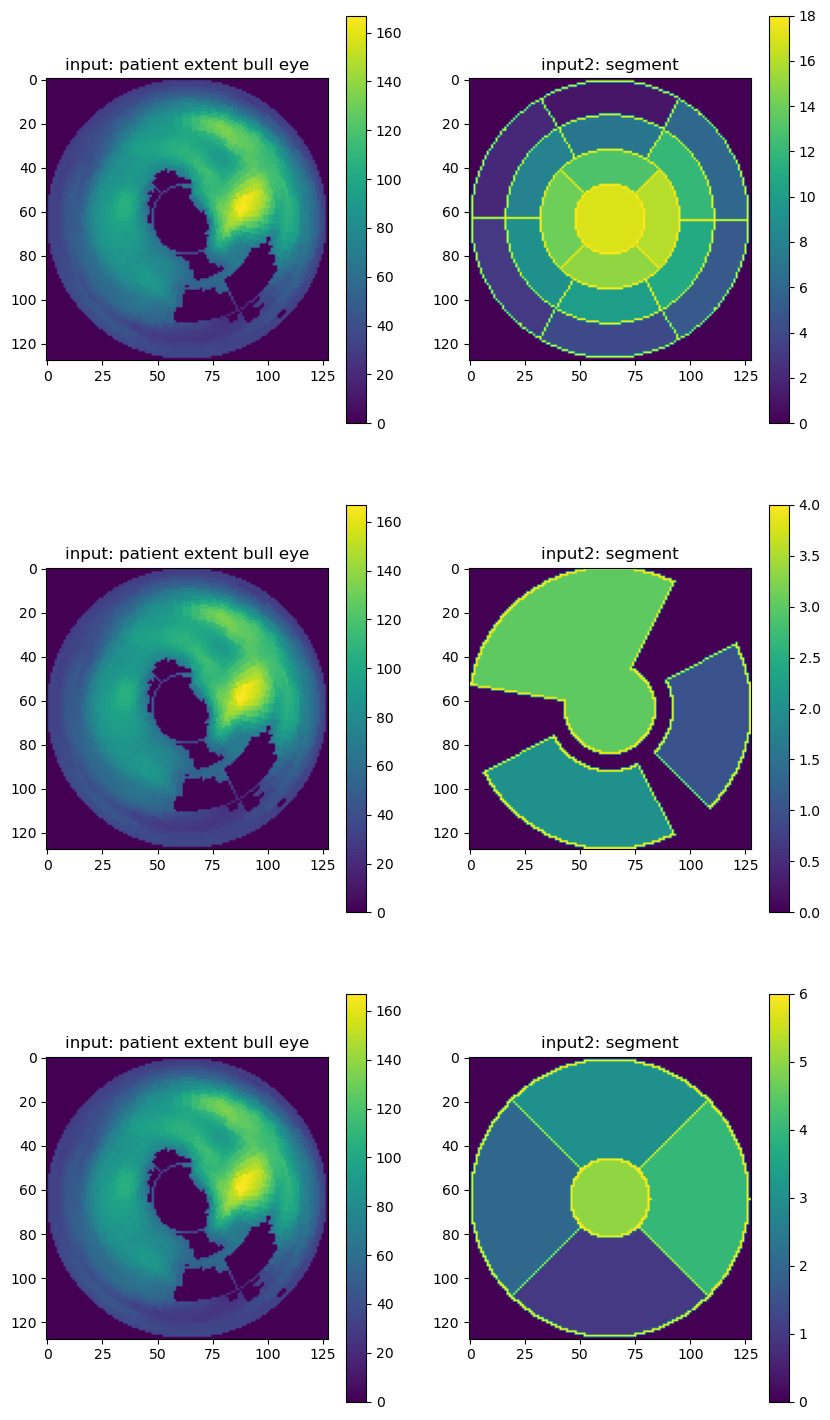

In [13]:
defect_extent_polor_map = gen_defect_extent_bull_eye_map(commercial_software_gen_cad_bull_eye, normal_limits_bull_eye)
defect_extent_dict17 = cal_defect_extent(defect_extent_polor_map, segment17)
print(defect_extent_dict17)
defect_extent_dict_cor = cal_defect_extent(defect_extent_polor_map, segment_coronary_artery)
print(defect_extent_dict_cor)
defect_extent_dict_myo = cal_defect_extent(defect_extent_polor_map, segment_myocardial_wall)
print(defect_extent_dict_myo)

plt.figure(figsize=(10,18))
plt.subplot(321)
plt.imshow(defect_extent_polor_map)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(322)
plt.imshow(segment17)
plt.title('input2: segment')
plt.colorbar()

plt.subplot(323)
plt.imshow(defect_extent_polor_map)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(324)
plt.imshow(segment_coronary_artery)
plt.title('input2: segment')
plt.colorbar()

plt.subplot(325)
plt.imshow(defect_extent_polor_map)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(326)
plt.imshow(segment_myocardial_wall)
plt.title('input2: segment')
plt.colorbar()


{1.0: 0.0, 2.0: 0.0, 3.0: 0.0, 4.0: 0.00582440011203289, 5.0: 0.04131491482257843, 6.0: 0.0, 7.0: 0.0, 8.0: 0.0, 9.0: 0.0, 10.0: 1.0329995155334473, 11.0: 3.4501521587371826, 12.0: 0.0, 13.0: 0.8146281838417053, 14.0: 0.08787630498409271, 15.0: 0.22562597692012787, 16.0: 0.0, 17.0: 6.237520694732666, 'total': 69.42157536708848}
{1.0: 0.5018981695175171, 2.0: 0.23142416775226593, 3.0: 1.1367881298065186, 'total': 75.24591066489214}
{1.0: 0.6370267271995544, 2.0: 0.0035214433446526527, 3.0: 0.0866047590970993, 4.0: 0.3563093841075897, 5.0: 5.124493598937988, 'total': 65.13509932474875}


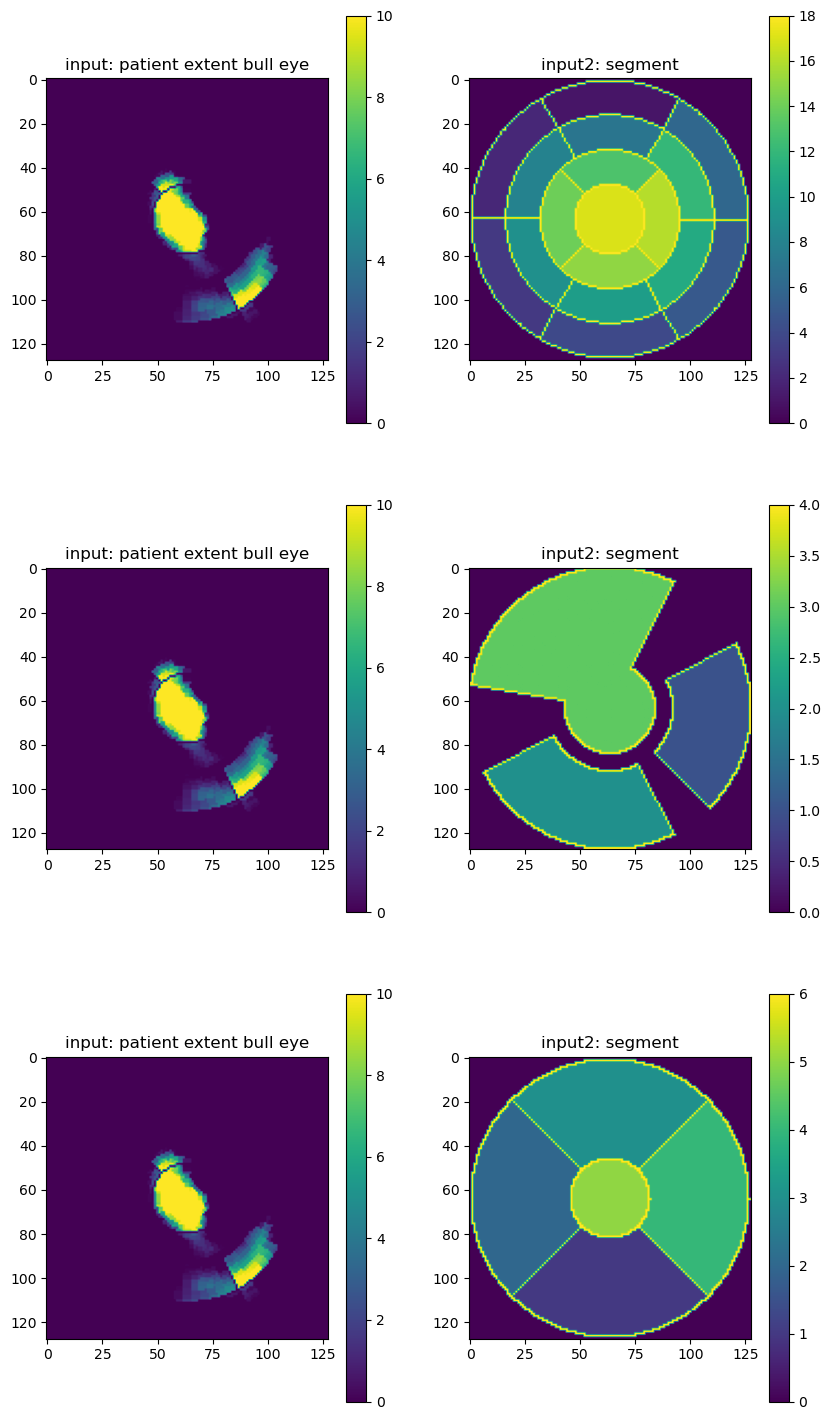

In [14]:
defect_severity_polor_map = gen_defect_severity_bull_eye_map(commercial_software_gen_cad_bull_eye, normal_limits_bull_eye, normal_limits_bull_eye_sd)
defect_severity_dict17 = cal_defect_severity(defect_severity_polor_map, segment17)
print(defect_severity_dict17)
defect_extent_dict_cor = cal_defect_severity(defect_severity_polor_map, segment_coronary_artery)
print(defect_extent_dict_cor)
defect_extent_dict_myo = cal_defect_severity(defect_severity_polor_map, segment_myocardial_wall)
print(defect_extent_dict_myo)

plt.figure(figsize=(10,18))
plt.subplot(321)
plt.imshow(defect_severity_polor_map)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(322)
plt.imshow(segment17)
plt.title('input2: segment')
plt.colorbar()

plt.subplot(323)
plt.imshow(defect_severity_polor_map)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(324)
plt.imshow(segment_coronary_artery)
plt.title('input2: segment')
plt.colorbar()

plt.subplot(325)
plt.imshow(defect_severity_polor_map)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(326)
plt.imshow(segment_myocardial_wall)
plt.title('input2: segment')
plt.colorbar()


{1.0: 0.0, 2.0: 0.0, 3.0: 0.0, 4.0: 1.911589008363202, 5.0: 8.323281061519904, 6.0: 0.0, 7.0: 0.0, 8.0: 0.0, 9.0: 0.0, 10.0: 52.883031301482696, 11.0: 65.7672849915683, 12.0: 0.0, 13.0: 17.51824817518248, 14.0: 7.116788321167883, 15.0: 24.45255474452555, 16.0: 0.0, 17.0: 75.26737967914438, 'total': 14.134398333043933}
{1.0: 12.547454237937927, 2.0: 5.785604193806648, 3.0: 28.419703245162964, 'total': 18.811477720737457}
{1.0: 15.925668179988861, 2.0: 0.08803608361631632, 3.0: 2.1651189774274826, 4.0: 8.907734602689743, 5.0: 128.1123399734497, 'total': 16.283774375915527}


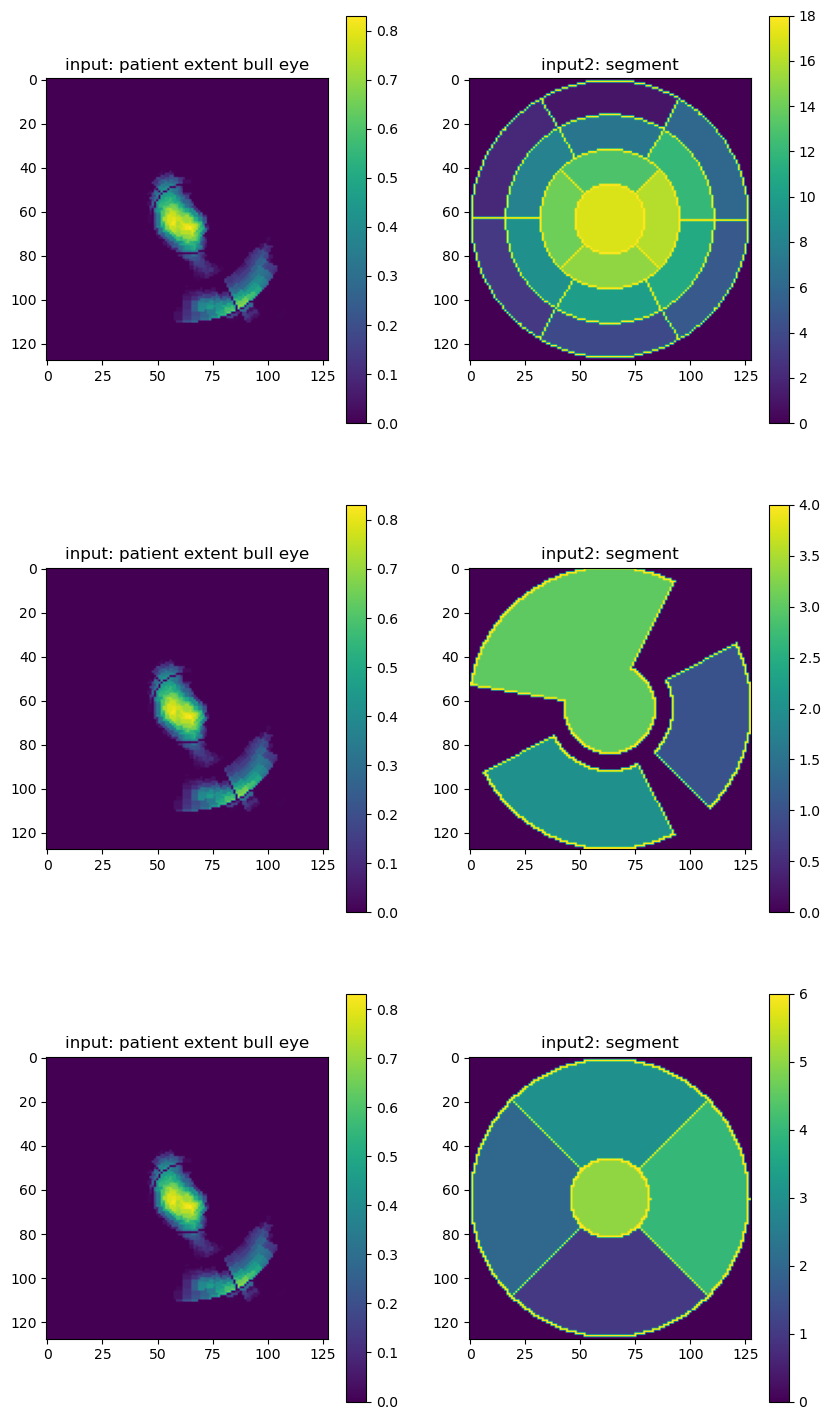

In [15]:
score_bull_eye = gen_score_bull_eye(commercial_software_gen_cad_bull_eye, normal_limits_bull_eye)
tpd_dict17 = cal_tdp(score_bull_eye, segment17)
print(defect_extent_dict17)
tpd_dict_cor = cal_tdp(defect_severity_polor_map, segment_coronary_artery)
print(tpd_dict_cor)
tpd_dict17_myo = cal_tdp(defect_severity_polor_map, segment_myocardial_wall)
print(tpd_dict17_myo)

plt.figure(figsize=(10,18))
plt.subplot(321)
plt.imshow(score_bull_eye)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(322)
plt.imshow(segment17)
plt.title('input2: segment')
plt.colorbar()

plt.subplot(323)
plt.imshow(score_bull_eye)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(324)
plt.imshow(segment_coronary_artery)
plt.title('input2: segment')
plt.colorbar()

plt.subplot(325)
plt.imshow(score_bull_eye)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(326)
plt.imshow(segment_myocardial_wall)
plt.title('input2: segment')
plt.colorbar()


[0.0, 0.0, 0.0, 0.0016067298, 0.007415495, 0.0, 0.0, 0.0, 0.0, 0.12713845, 0.17320134, 0.0, 0.030323837, 0.009901557, 0.023572855, 0.0, 0.3534786]
[0.50189817, 0.23142417, 1.1367881]
[0.6370267, 0.0035214433, 0.08660476, 0.35630938, 5.1244936]


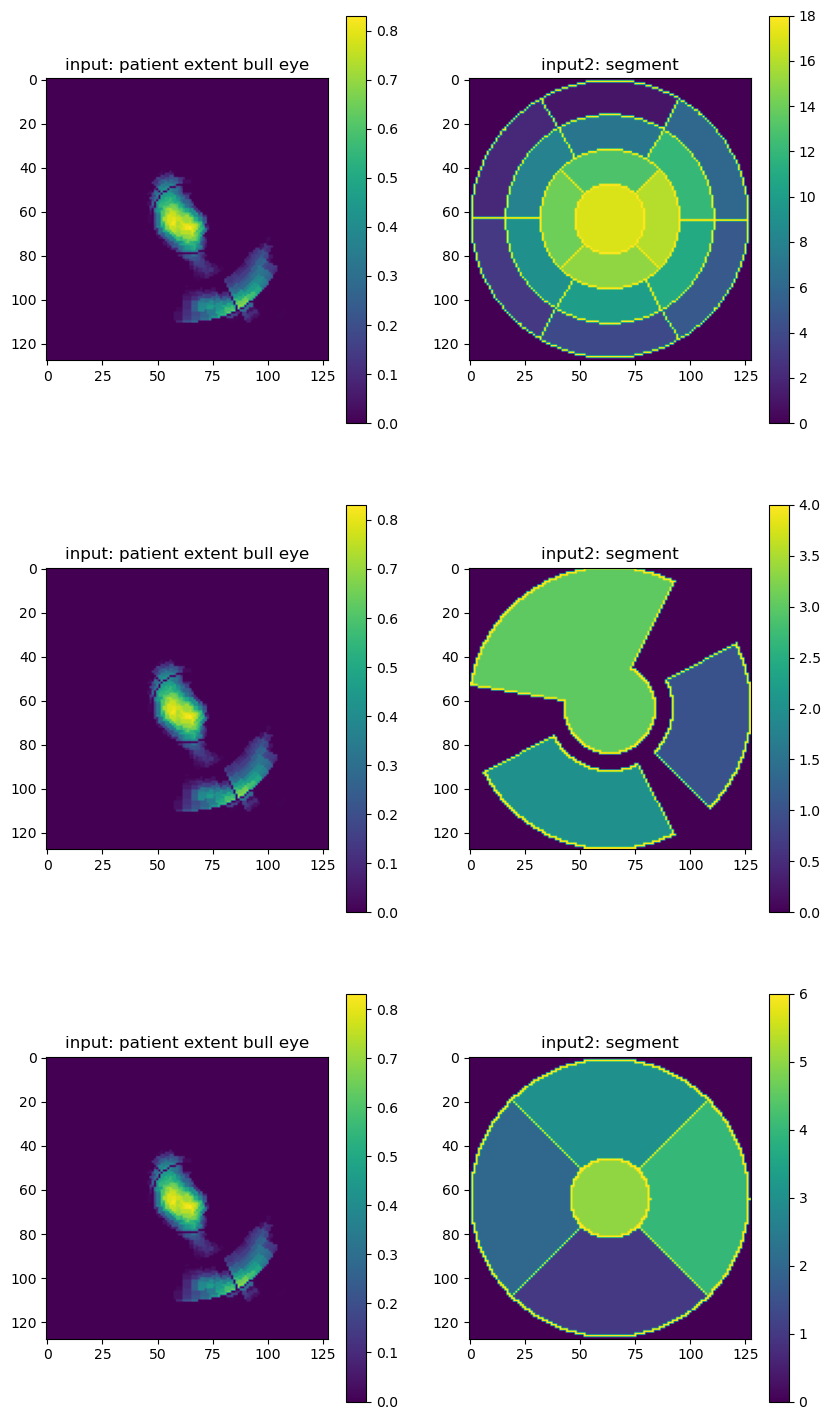

In [17]:
def cal_categoric_scores(score_bull_eye, segment, max_boarder=True):
    _segment = segment+0
    if max_boarder:
        filt = _segment == np.max(_segment)
        _segment[filt] = 0
    
    categoric_scores = []
    foreground = np.unique(_segment)
    foreground = foreground[foreground>0]
    for seg_id in foreground:
        score = np.mean(score_bull_eye[_segment == seg_id])
        # print(score)
        # score = 0 if score < 1 else np.round(np.clip(max(2,score),2,5))
        categoric_scores.append(score)
    return categoric_scores


score_bull_eye = gen_score_bull_eye(commercial_software_gen_cad_bull_eye, normal_limits_bull_eye)
categoric_scores_seg17 = cal_categoric_scores(score_bull_eye, segment17)
print(categoric_scores_seg17)
categoric_scores_cor = cal_categoric_scores(defect_severity_polor_map, segment_coronary_artery)
print(categoric_scores_cor)
categoric_scores_myo = cal_categoric_scores(defect_severity_polor_map, segment_myocardial_wall)
print(categoric_scores_myo)

plt.figure(figsize=(10,18))
plt.subplot(321)
plt.imshow(score_bull_eye)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(322)
plt.imshow(segment17)
plt.title('input2: segment')
plt.colorbar()

plt.subplot(323)
plt.imshow(score_bull_eye)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(324)
plt.imshow(segment_coronary_artery)
plt.title('input2: segment')
plt.colorbar()

plt.subplot(325)
plt.imshow(score_bull_eye)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(326)
plt.imshow(segment_myocardial_wall)
plt.title('input2: segment')
plt.colorbar()


In [18]:
categoric_scores_myo = cal_categoric_scores(defect_severity_polor_map, segment_myocardial_wall)
print(categoric_scores_myo)

[0.6370267, 0.0035214433, 0.08660476, 0.35630938, 5.1244936]


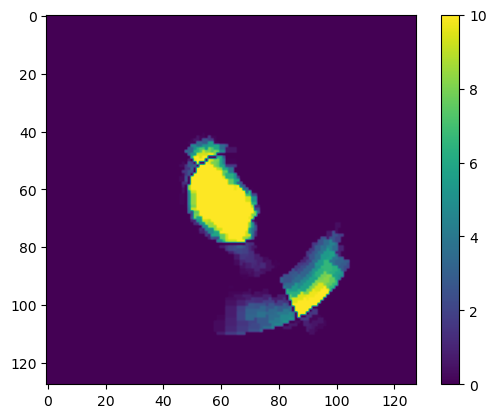

In [20]:
plt.imshow(defect_severity_polor_map)
plt.colorbar()